データをCSVファイルに保存しました: G:\共有ドライブ\GAP_長寿研\user\iwamoto\視線の動きの俊敏さ\result\tv\prediction_data.csv
データプレビュー:
     ID  True_Value  Predicted_Value
0  S001          24               25
1  S002          27               25
2  S003          22               25
3  S004          25               25
4  S005          28               25

データサマリー:
データ数: 102
True_Value 平均: 24.07, 標準偏差: 3.60
Predicted_Value 平均: 24.04, 標準偏差: 1.43
画像を保存しました: G:\共有ドライブ\GAP_長寿研\user\iwamoto\視線の動きの俊敏さ\result\tv\prediction_data_analysis.png


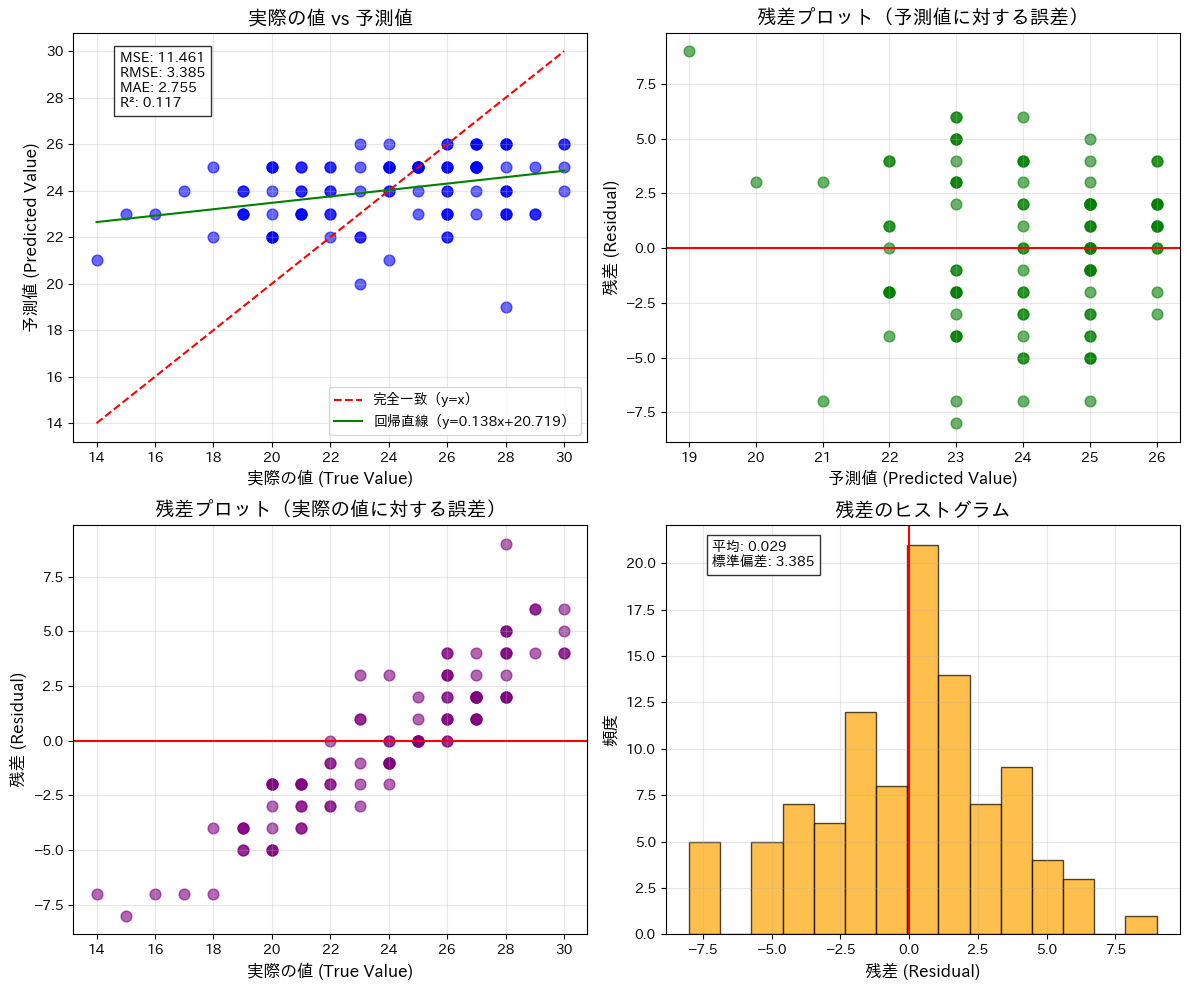


評価指標:
平均二乗誤差 (MSE): 11.461
平方根平均二乗誤差 (RMSE): 3.385
平均絶対誤差 (MAE): 2.755
決定係数 (R²): 0.117
残差の平均: 0.029
残差の標準偏差: 3.385
最大誤差: 9.000
エラーが発生しました: name 'metadata_path' is not defined


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import japanize_matplotlib

# 指定されたパスを設定
base_dir = r"G:"  # G:ドライブのルート
output_dir = r"G:\共有ドライブ\GAP_長寿研\user\iwamoto\視線の動きの俊敏さ\result\tv"
csv_file_path = r"G:\共有ドライブ\GAP_長寿研\user\iwamoto\視線の動きの俊敏さ\result\tv\predictions_catboostregressor.csv"

# CSVファイルを読み込む
def load_and_plot_data(csv_file_path, true_col='True_Value', pred_col='Predicted_Value', output_path=None):
    """
    CSVファイルを読み込み、True_ValueとPredicted_Valueの散布図を描画する関数
    
    Parameters:
    -----------
    csv_file_path : str
        CSVファイルのパス
    true_col : str
        実際の値が格納されている列名
    pred_col : str
        予測値が格納されている列名
    output_path : str
        出力ファイルのパス (Noneの場合は出力ディレクトリにデフォルト名で保存)
    """
    try:
        # CSVファイルの読み込み
        df = pd.read_csv(csv_file_path)
        
        # データフレームの最初の数行を表示して確認
        print("データプレビュー:")
        print(df.head())
        
        # 必要なカラムがあるか確認
        if true_col not in df.columns or pred_col not in df.columns:
            print(f"CSVファイルには {true_col} と {pred_col} の列が必要です")
            print(f"利用可能な列: {', '.join(df.columns)}")
            return
        
        # データの抽出
        true_values = df[true_col].values
        predicted_values = df[pred_col].values
        
        # データのサマリーを表示
        print("\nデータサマリー:")
        print(f"データ数: {len(true_values)}")
        print(f"{true_col} 平均: {np.mean(true_values):.2f}, 標準偏差: {np.std(true_values):.2f}")
        print(f"{pred_col} 平均: {np.mean(predicted_values):.2f}, 標準偏差: {np.std(predicted_values):.2f}")
        
        # 評価指標の計算
        mse = mean_squared_error(true_values, predicted_values)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(true_values, predicted_values)
        r2 = r2_score(true_values, predicted_values)
        
        # 図の設定
        plt.figure(figsize=(12, 10))
        
        # 1. 散布図
        plt.subplot(2, 2, 1)
        plt.scatter(true_values, predicted_values, alpha=0.6, s=60, c='blue')
        
        # 完全一致線
        min_val = min(min(true_values), min(predicted_values))
        max_val = max(max(true_values), max(predicted_values))
        plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='完全一致（y=x）')
        
        # 回帰直線
        z = np.polyfit(true_values, predicted_values, 1)
        p = np.poly1d(z)
        plt.plot(np.array([min_val, max_val]), p(np.array([min_val, max_val])), 'g-', 
                 label=f'回帰直線（y={z[0]:.3f}x+{z[1]:.3f}）')
        
        plt.xlabel('実際の値 (True Value)', fontsize=12)
        plt.ylabel('予測値 (Predicted Value)', fontsize=12)
        plt.title('実際の値 vs 予測値', fontsize=14)
        plt.grid(True, alpha=0.3)
        plt.legend()
        
        # テキスト情報を追加
        plt.text(min_val + (max_val-min_val)*0.05, max_val - (max_val-min_val)*0.15, 
                 f'MSE: {mse:.3f}\nRMSE: {rmse:.3f}\nMAE: {mae:.3f}\nR²: {r2:.3f}', 
                 fontsize=10, bbox=dict(facecolor='white', alpha=0.8))
        
        # 2. 残差プロット
        plt.subplot(2, 2, 2)
        residuals = true_values - predicted_values
        plt.scatter(predicted_values, residuals, alpha=0.6, s=60, c='green')
        plt.axhline(y=0, color='r', linestyle='-')
        plt.xlabel('予測値 (Predicted Value)', fontsize=12)
        plt.ylabel('残差 (Residual)', fontsize=12)
        plt.title('残差プロット（予測値に対する誤差）', fontsize=14)
        plt.grid(True, alpha=0.3)
        
        # 3. 実際の値に対する残差プロット
        plt.subplot(2, 2, 3)
        plt.scatter(true_values, residuals, alpha=0.6, s=60, c='purple')
        plt.axhline(y=0, color='r', linestyle='-')
        plt.xlabel('実際の値 (True Value)', fontsize=12)
        plt.ylabel('残差 (Residual)', fontsize=12)
        plt.title('残差プロット（実際の値に対する誤差）', fontsize=14)
        plt.grid(True, alpha=0.3)
        
        # 4. 残差のヒストグラム
        plt.subplot(2, 2, 4)
        plt.hist(residuals, bins=15, alpha=0.7, color='orange', edgecolor='black')
        plt.axvline(x=0, color='r', linestyle='-')
        plt.xlabel('残差 (Residual)', fontsize=12)
        plt.ylabel('頻度', fontsize=12)
        plt.title('残差のヒストグラム', fontsize=14)
        plt.grid(True, alpha=0.3)
        
        # 統計情報を追加
        mean_residual = np.mean(residuals)
        std_residual = np.std(residuals)
        plt.text(min(residuals) + (max(residuals)-min(residuals))*0.05, 
                 plt.gca().get_ylim()[1] * 0.9, 
                 f'平均: {mean_residual:.3f}\n標準偏差: {std_residual:.3f}', 
                 fontsize=10, bbox=dict(facecolor='white', alpha=0.8))
        
        plt.tight_layout()
        
        # 出力ファイルのパスを設定
        if output_path is None:
            # ファイル名を入力ファイルから作成
            base_filename = os.path.basename(csv_file_path)
            filename_without_ext = os.path.splitext(base_filename)[0]
            output_path = os.path.join(output_dir, f"{filename_without_ext}_analysis.png")
        
        # 画像ファイルとして保存
        plt.savefig(output_path)  
        print(f"画像を保存しました: {output_path}")
        plt.show()
        
        # 追加の統計情報を出力
        print("\n評価指標:")
        print(f"平均二乗誤差 (MSE): {mse:.3f}")
        print(f"平方根平均二乗誤差 (RMSE): {rmse:.3f}")
        print(f"平均絶対誤差 (MAE): {mae:.3f}")
        print(f"決定係数 (R²): {r2:.3f}")
        print(f"残差の平均: {mean_residual:.3f}")
        print(f"残差の標準偏差: {std_residual:.3f}")
        print(f"最大誤差: {max(abs(residuals)):.3f}")
        
        # メタデータとの結合
        if os.path.exists(metadata_path):
            try:
                metadata_df = pd.read_csv(metadata_path)
                print("\nメタデータを読み込みました。")
                # ここでメタデータとの結合や追加分析を行うことができます
                # 例: ID列を使用してデータフレームを結合する場合
                if 'ID' in df.columns and 'ID' in metadata_df.columns:
                    merged_df = pd.merge(df, metadata_df, on='ID', how='left')
                    print("メタデータと結合しました。結合後のデータサンプル:")
                    print(merged_df.head())
                    
                    # 結合したデータの保存
                    merged_output_path = os.path.join(output_dir, f"{filename_without_ext}_with_metadata.csv")
                    merged_df.to_csv(merged_output_path, index=False)
                    print(f"結合データを保存しました: {merged_output_path}")
            except Exception as e:
                print(f"メタデータの読み込みまたは結合時にエラーが発生しました: {e}")
        
        return df, true_values, predicted_values
        
    except Exception as e:
        print(f"エラーが発生しました: {e}")
        return None, None, None

# 与えられたデータをCSVに変換する関数（現在のデータを使用する場合）
def create_csv_from_data(output_path=None):
    """
    提供されたデータをCSVファイルに変換する
    
    Parameters:
    -----------
    output_path : str
        出力CSVファイルのパス (Noneの場合は出力ディレクトリにデフォルト名で保存)
    """
    # サンプルデータ
    true_values = [24, 27, 22, 25, 28, 26, 23, 27, 27, 21, 20, 28, 19, 26, 22, 22, 22, 27, 14, 20, 28, 19, 30, 30, 19, 27, 22, 27, 20, 28, 26, 24, 27, 26, 22, 25, 21, 25, 25, 23, 29, 29, 21, 23, 26, 21, 25, 17, 22, 20, 20, 27, 24, 18, 23, 25, 16, 27, 29, 21, 27, 15, 27, 21, 26, 19, 30, 25, 26, 21, 23, 20, 20, 18, 28, 28, 20, 28, 20, 26, 24, 24, 25, 28, 24, 26, 24, 28, 26, 26, 27, 28, 30, 26, 23, 21, 28, 19, 24, 27, 28, 24]
    predicted_values = [25, 25, 25, 25, 25, 24, 26, 26, 25, 25, 22, 26, 23, 23, 22, 23, 23, 26, 21, 22, 23, 23, 26, 24, 24, 25, 24, 25, 22, 23, 26, 25, 25, 25, 24, 25, 23, 24, 25, 20, 23, 25, 23, 22, 22, 24, 25, 24, 25, 25, 23, 26, 25, 25, 22, 25, 23, 25, 23, 23, 24, 23, 26, 23, 25, 24, 25, 23, 26, 25, 25, 24, 25, 22, 24, 19, 22, 23, 25, 24, 24, 26, 25, 26, 21, 22, 25, 26, 23, 25, 25, 26, 26, 23, 24, 24, 24, 23, 25, 23, 24, 24]

    # データフレームを作成
    df = pd.DataFrame({
        'ID': [f'S{i:03d}' for i in range(1, len(true_values) + 1)],
        'True_Value': true_values,
        'Predicted_Value': predicted_values
    })

    # 出力パスが指定されていない場合、デフォルトのパスを使用
    if output_path is None:
        output_path = os.path.join(output_dir, 'prediction_data.csv')

    # CSVファイルに保存
    df.to_csv(output_path, index=False)
    print(f"データをCSVファイルに保存しました: {output_path}")
    return output_path

# 2つの列がある別々のCSVファイルから結合されたCSVを作成
def combine_csv_data(true_values_csv, predicted_values_csv, output_path=None, true_col='Value', pred_col='Value', id_col='ID'):
    """
    2つのCSVファイルから実際の値と予測値を結合する関数
    
    Parameters:
    -----------
    true_values_csv : str
        実際の値が格納されたCSVファイルのパス
    predicted_values_csv : str
        予測値が格納されたCSVファイルのパス
    output_path : str
        出力CSVファイルのパス (Noneの場合は出力ディレクトリにデフォルト名で保存)
    true_col : str
        実際の値が格納されている列名
    pred_col : str
        予測値が格納されている列名
    id_col : str
        ID列の名前
    """
    try:
        # 両方のCSVファイルを読み込む
        true_df = pd.read_csv(true_values_csv)
        pred_df = pd.read_csv(predicted_values_csv)
        
        # 両方のデータフレームにID列があるか確認
        if id_col not in true_df.columns or id_col not in pred_df.columns:
            print(f"両方のCSVファイルには '{id_col}' 列が必要です")
            return None
        
        # 必要な列が存在するか確認
        if true_col not in true_df.columns:
            print(f"実際の値のCSVファイルには '{true_col}' 列が必要です")
            return None
        
        if pred_col not in pred_df.columns:
            print(f"予測値のCSVファイルには '{pred_col}' 列が必要です")
            return None
        
        # ID列でマージ
        merged_df = pd.merge(true_df[[id_col, true_col]], 
                            pred_df[[id_col, pred_col]], 
                            on=id_col, 
                            how='inner',
                            suffixes=('', '_pred'))
        
        # 列名を変更
        merged_df = merged_df.rename(columns={true_col: 'True_Value', 
                                           pred_col: 'Predicted_Value'})
        
        # 出力パスが指定されていない場合、デフォルトのパスを使用
        if output_path is None:
            # 両方のファイル名から新しいファイル名を作成
            true_filename = os.path.splitext(os.path.basename(true_values_csv))[0]
            pred_filename = os.path.splitext(os.path.basename(predicted_values_csv))[0]
            output_path = os.path.join(output_dir, f"{true_filename}_{pred_filename}_combined.csv")
        
        # CSVファイルに保存
        merged_df.to_csv(output_path, index=False)
        print(f"結合データをCSVファイルに保存しました: {output_path}")
        
        return output_path
    
    except Exception as e:
        print(f"エラーが発生しました: {e}")
        return None

# 使用例
if __name__ == "__main__":
    # 0. 出力ディレクトリの存在確認と作成
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
        print(f"出力ディレクトリを作成しました: {output_dir}")
    
    # 1. 既存のCSVファイルがある場合
    csv_file_path = os.path.join(base_dir, "path", "to", "your_data.csv")
    load_and_plot_data(csv_file_path)
    
    # 2. サンプルデータからCSVを作成して分析
    # sample_csv_path = create_csv_from_data()
    # load_and_plot_data(sample_csv_path)
    
    # 3. 別々のCSVファイルからデータを結合して分析する例
    # true_values_csv = os.path.join(base_dir, "path", "to", "true_values.csv")
    # predicted_values_csv = os.path.join(base_dir, "path", "to", "predicted_values.csv")
    # combined_csv_path = combine_csv_data(true_values_csv, predicted_values_csv)
    # if combined_csv_path:
    #     load_and_plot_data(combined_csv_path)